# 2019B Semestar Flats Analisys

In this document I present an analisys for all AEON nights of 2019B semester.

In [7]:
import os
import numpy as np
import logging
from ccdproc import ImageFileCollection, CCDData
from IPython.display import display
import matplotlib.pyplot as plt
from goodman_pipeline.core import image_trim

logging.disable()

KEYWORDS = ['gsp_tech',
            'gain',
            'roi',
            'exptime',
            'rdnoise']


data_location = '/user/simon/data/soar/flat_analisis_2019B'

all_files = []
for data_dir in sorted(os.listdir(data_location)):
    for _file in os.listdir(os.path.join(data_location, data_dir, 'master_bias')):
        all_files.append(os.path.join(data_location, data_dir, 'master_bias', _file))
# for _input in sorted(all_files):
#     print(_input)

def get_flat_files_as_pandas_dataframe():
    ifc = ImageFileCollection(filenames=all_files, keywords=KEYWORDS, glob_include='*.fits')
    df = ifc.summary.to_pandas()
    groups = df.groupby(['gsp_tech',
                         'gain',
                         'roi',
                         'exptime',
                         'rdnoise']).size().reset_index().rename(
        columns={0: 'count'})
    all_groups = []
    for i in groups.index:
        conf_group = df[((df['gsp_tech'] == groups.iloc[i]['gsp_tech']) &
                         (df['gain'] == groups.iloc[i]['gain']) &
                         (df['roi'] == groups.iloc[i]['roi']) &
                         (df['exptime'] == groups.iloc[i]['exptime']) &
                         (df['rdnoise'] == groups.iloc[i]['rdnoise']))]
        all_groups.append(conf_group.sort_values(by='file'))

    return all_groups

In [8]:
all_groups = get_flat_files_as_pandas_dataframe()

## Tabulated Data

After collecting all master flats obtained during the semester **2019B** they are grouped together using **AND** logic for the values of the following header keywords.

  - `SLIT` : Name of the slit
  - `GRATING`: Name of the grating
  - `CAM_TARG`: Camera Angle Target value (predefined)
  - `GRT_TARG`: Grating Angle Target value (predefined)
  - `FILTER`: Filter in first filter wheel, generaly used for Imaging filters
  - `FILTER2`: Filter in second filter wheel, generaly used for Spectroscopy
  - `GSP_TECH`: Keyword addded by the goodman Pipeline that is a shortcut for know if is Imaging or Spectroscopy data
  - `GAIN`: Gain
  - `RDNOISE`: Readout Noise
  - `ROI`: Region of interest
  - `WAVMODE`: Combination of grating l/mm value with name of fixed (predefined) mode or Imaging
  - `EXPTIME`: Exposure time 
                        

In [9]:
for group in all_groups:
    display(group)
    if len(group) == 1:
        print(group.file.tolist())

,file,gsp_tech,gain,roi,exptime,rdnoise
1,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89
3,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89
5,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89
7,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89
9,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89
12,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89
14,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89
16,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89
20,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89
23,/user/simon/data/soar/flat_analisis_2019B/2019...,Imaging,1.48,Imaging 2x2,0.0,3.89


,file,gsp_tech,gain,roi,exptime,rdnoise
11,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Custom from Script,0.0,3.89
18,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Custom from Script,0.0,3.89
21,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Custom from Script,0.0,3.89
25,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Custom from Script,0.0,3.89
28,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Custom from Script,0.0,3.89
31,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Custom from Script,0.0,3.89
34,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Custom from Script,0.0,3.89
37,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Custom from Script,0.0,3.89
40,/user/simon/data/soar/flat_analisis_2019B/2020...,Spectroscopy,1.48,Custom from Script,0.0,3.89
43,/user/simon/data/soar/flat_analisis_2019B/2020...,Spectroscopy,1.48,Custom from Script,0.0,3.89


,file,gsp_tech,gain,roi,exptime,rdnoise
0,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89
2,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89
4,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89
6,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89
8,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89
10,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89
13,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89
15,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89
17,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89
19,/user/simon/data/soar/flat_analisis_2019B/2019...,Spectroscopy,1.48,Spectroscopic 2x2,0.0,3.89


## Grid Visualization

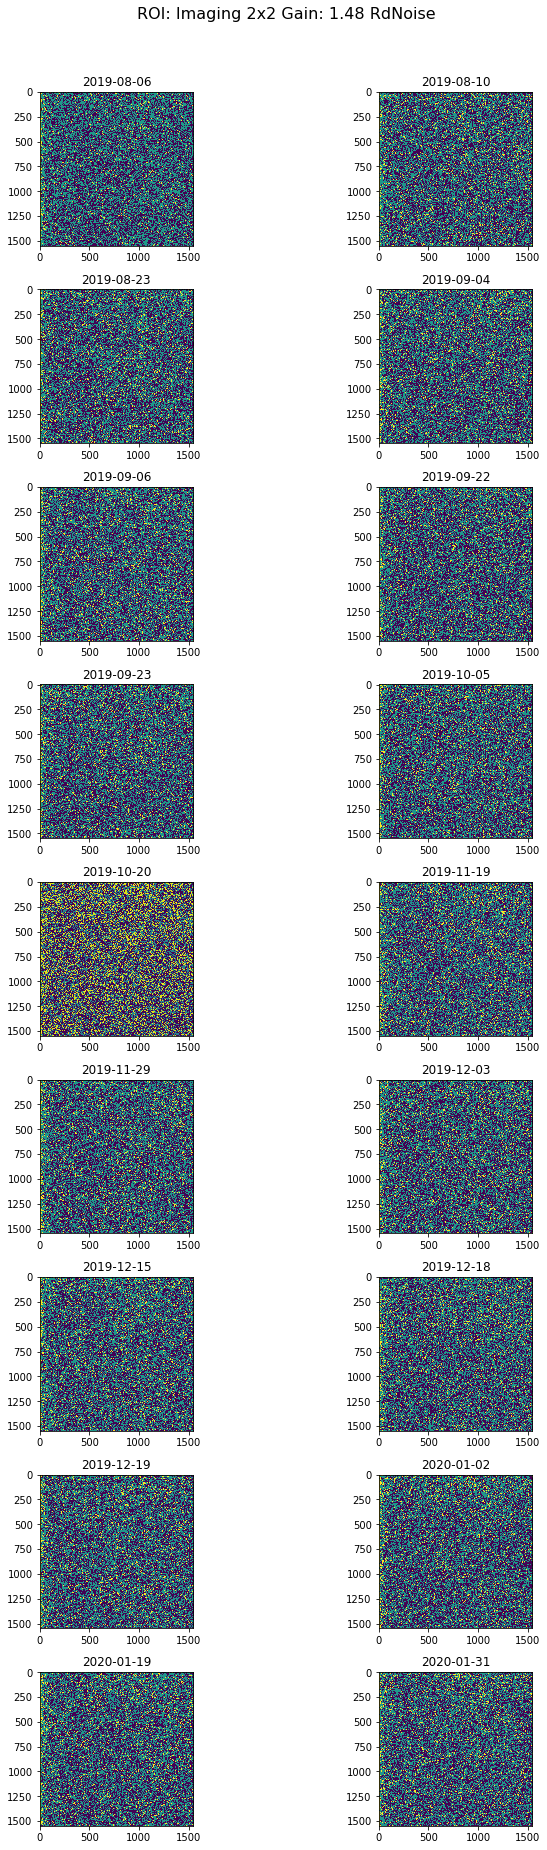

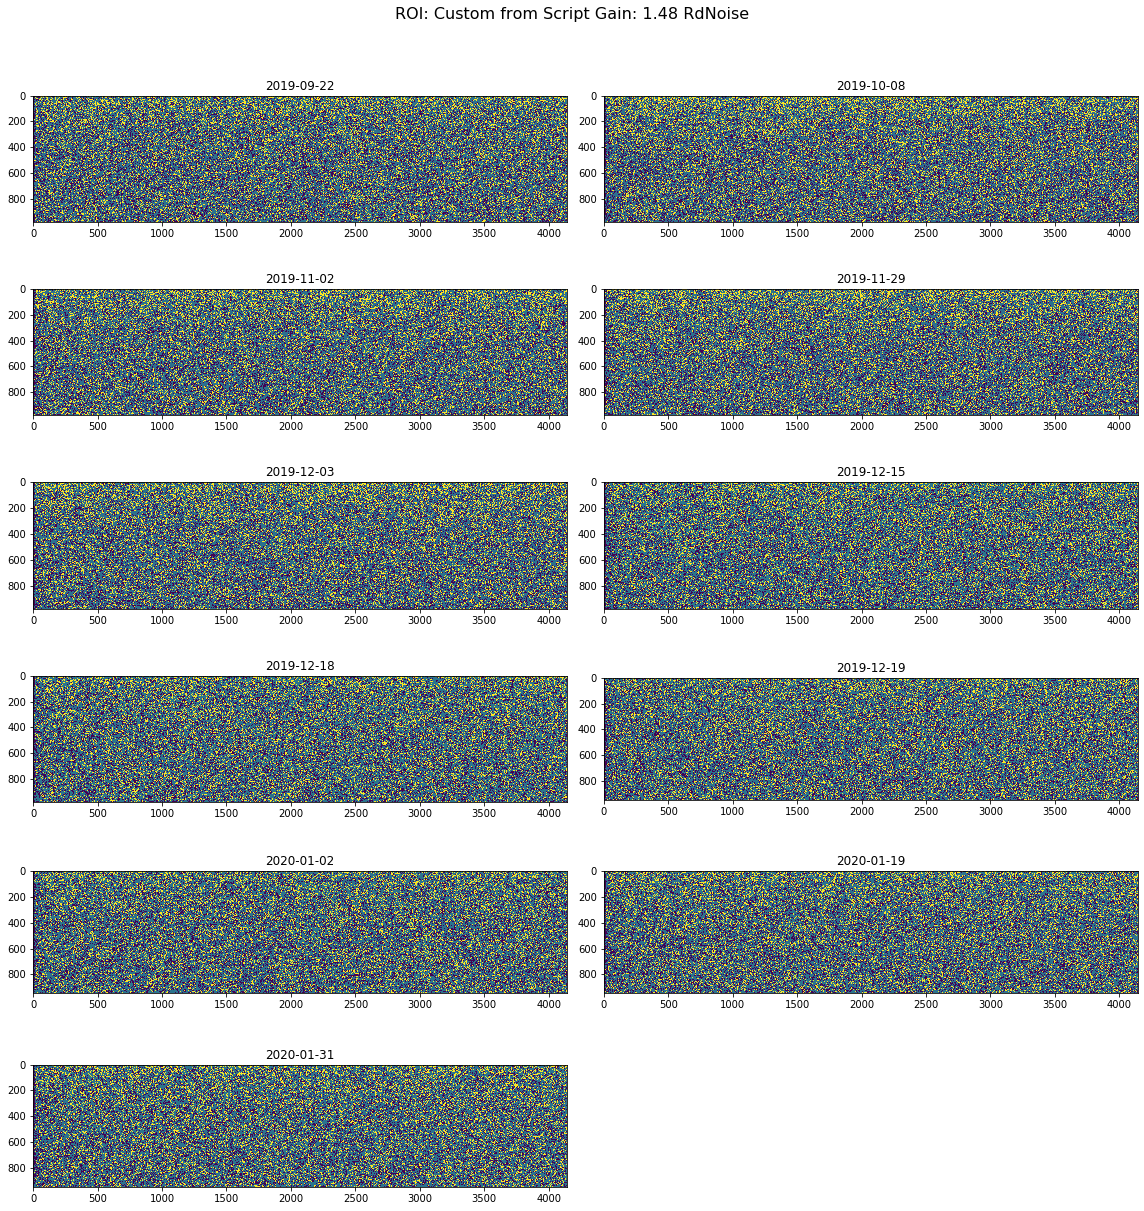

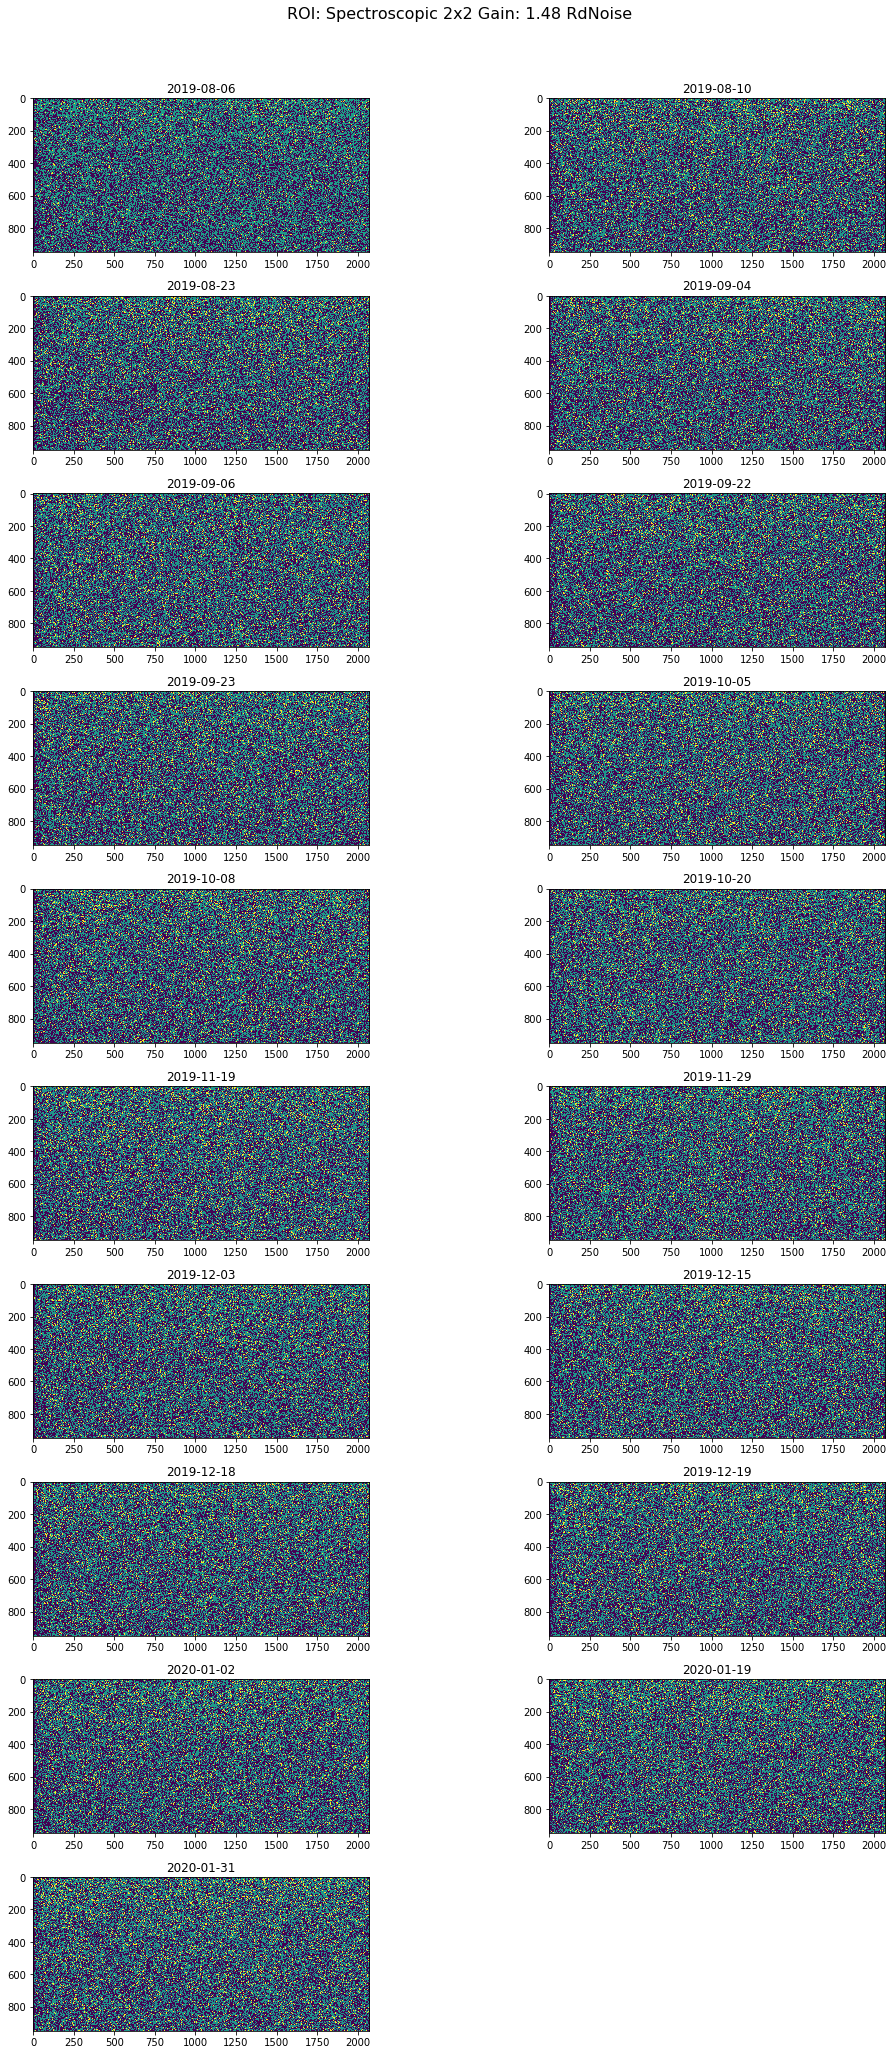

In [11]:
def visualize_as_grid(group):
    group_name = "ROI: {} Gain: {} RdNoise".format(group.roi.unique()[0], group.gain.unique()[0], group.rdnoise.unique()[0])
    nrows = int(np.ceil(len(group)/2.))
    ncols = 2
#     fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize = (16, nrows * 3 ))
   
    fig = plt.figure(figsize = (16, nrows * 3 ))
    fig.suptitle(group_name, fontsize=16)
    gs = fig.add_gridspec(ncols=ncols, nrows=nrows)
    for i, fits_file in enumerate(group.file.tolist()):
        ccd = CCDData.read(fits_file, unit='adu')
        z1 = np.mean(ccd.data) - 0.5 * np.std(ccd.data)
        z2 = np.median(ccd.data) + np.std(ccd.data)
        if i%2 == 0:
            y=0
        else:
            y=1
        ax_x = fig.add_subplot(gs[int(np.floor(i/2.)), y])
        ax_x.imshow(ccd.data, clim=(z1, z2), cmap='viridis')
        ax_x.title.set_text(ccd.header['DATE'])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
        
for group in all_groups:
    visualize_as_grid(group=group)

## Statistics

Imaging Master Bias Roi: Imaging 2x2
/user/simon/data/soar/flat_analisis_2019B/2019-08-06/master_bias/master_bias_RED_IM_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-08-10/master_bias/master_bias_RED_IM_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-08-23/master_bias/master_bias_RED_IM_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-09-04/master_bias/master_bias_RED_IM_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-09-06/master_bias/master_bias_RED_IM_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-09-22/master_bias/master_bias_RED_IM_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-09-23/master_bias/master_bias_RED_IM_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-10-05/master_bias/master_bias_RED_IM_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-10-20/master_bias/master_bias_RED_IM_2x2_R03.89_G01.48.fits


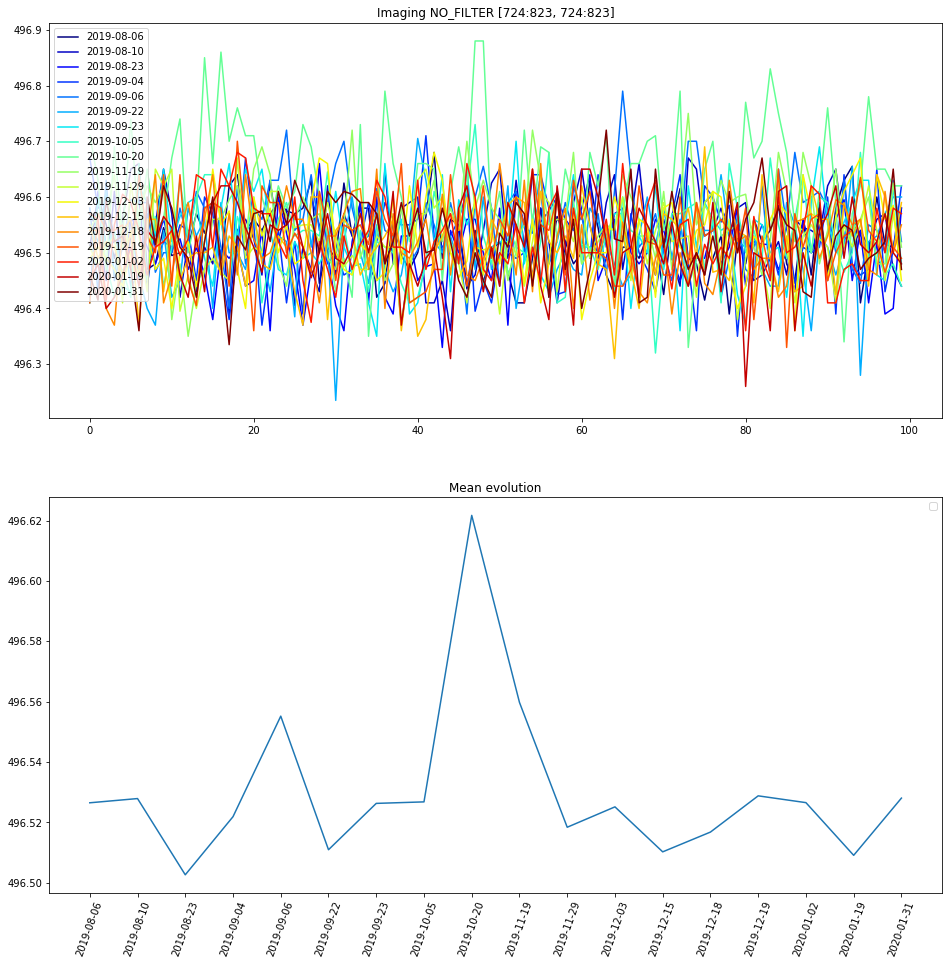

Spectroscopy group, Roi: Custom from Script
/user/simon/data/soar/flat_analisis_2019B/2019-09-22/master_bias/master_bias_RED_SP_1x1_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-10-08/master_bias/master_bias_RED_SP_1x1_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-11-02/master_bias/master_bias_RED_SP_1x1_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-11-29/master_bias/master_bias_RED_SP_1x1_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-12-03/master_bias/master_bias_RED_SP_1x1_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-12-15/master_bias/master_bias_RED_SP_1x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-12-18/master_bias/master_bias_RED_SP_1x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-12-19/master_bias/master_bias_RED_SP_1x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2020-01-02/master_bias/master_bias_RED_SP_1x2_R03.89_G01.4

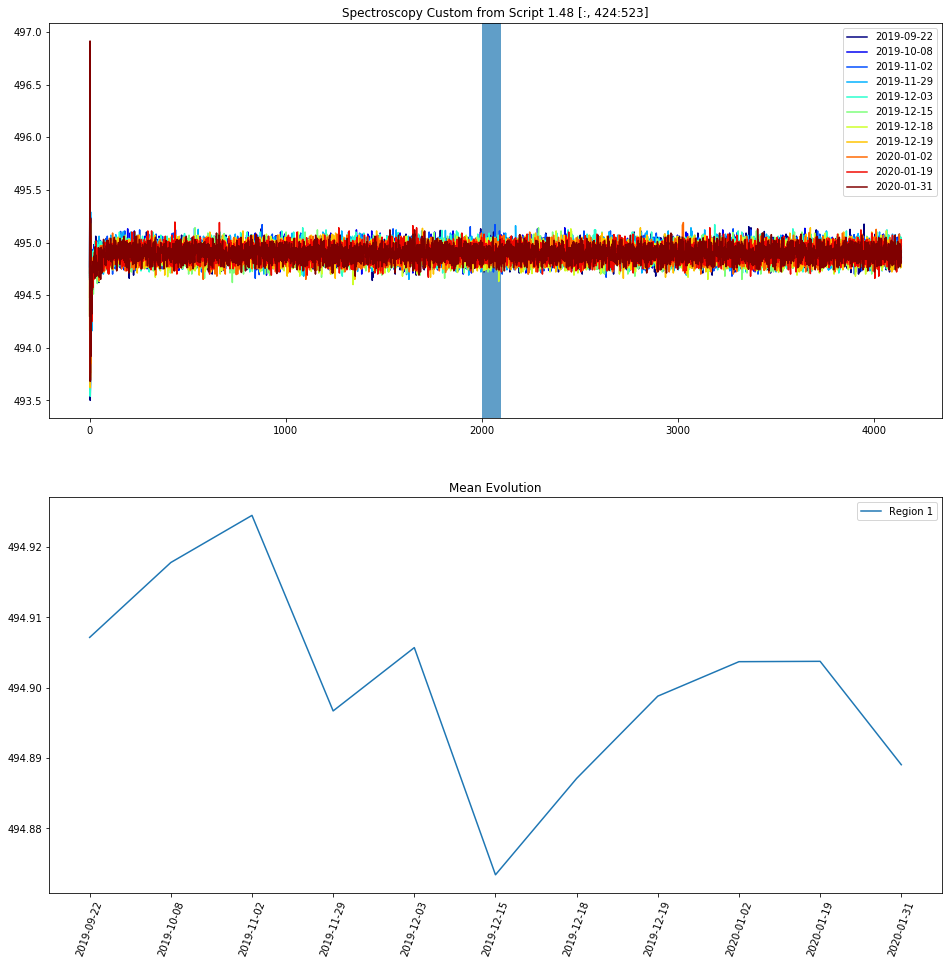

Spectroscopy group, Roi: Spectroscopic 2x2
/user/simon/data/soar/flat_analisis_2019B/2019-08-06/master_bias/master_bias_RED_SP_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-08-10/master_bias/master_bias_RED_SP_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-08-23/master_bias/master_bias_RED_SP_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-09-04/master_bias/master_bias_RED_SP_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-09-06/master_bias/master_bias_RED_SP_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-09-22/master_bias/master_bias_RED_SP_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-09-23/master_bias/master_bias_RED_SP_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-10-05/master_bias/master_bias_RED_SP_2x2_R03.89_G01.48.fits
/user/simon/data/soar/flat_analisis_2019B/2019-10-08/master_bias/master_bias_RED_SP_2x2_R03.89_G01.48

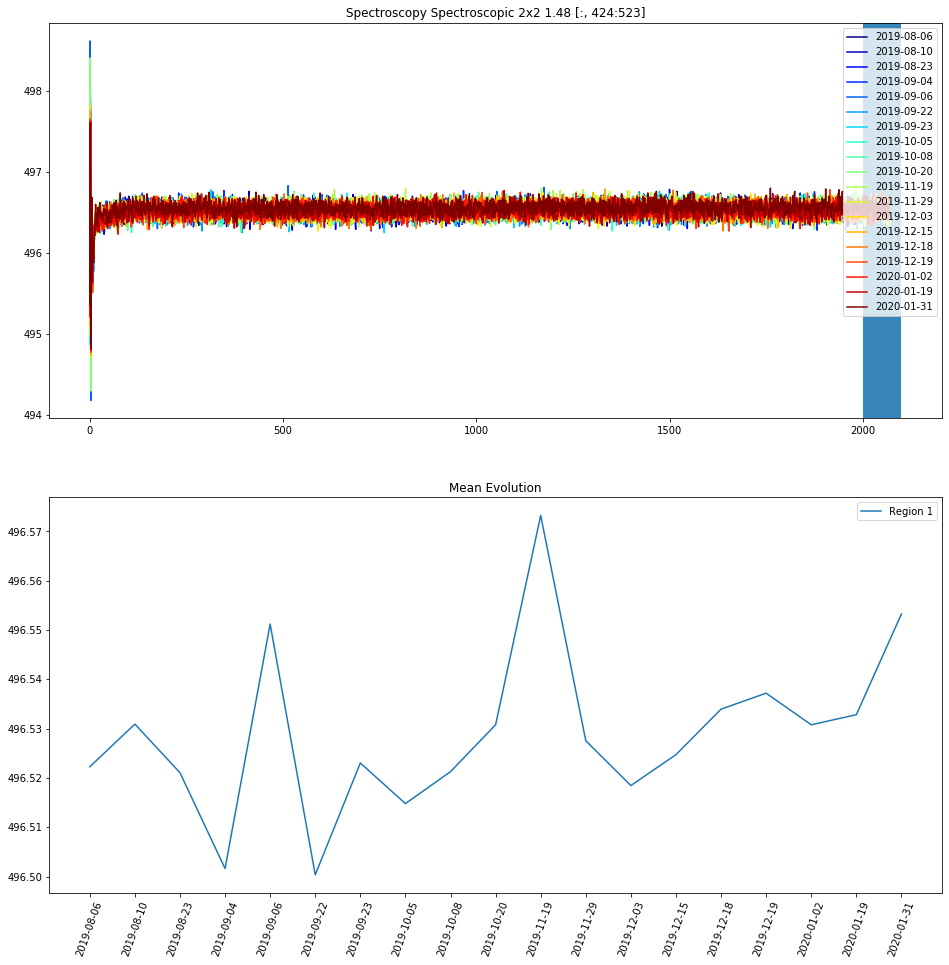

In [19]:
cmap = plt.get_cmap('jet')

    
for group in all_groups:
    if len(group) == 1:
        print("Ignoring file {}".format(group.file.unique()))
        continue
    colors = [cmap(i) for i in np.linspace(0, 1, len(group))]
    if group.gsp_tech.unique() == 'Spectroscopy':
        print("Spectroscopy group, Roi: {}".format(group.roi.unique()[0]))
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,16))
        all_mean = []
               
        all_date = []
        for i, _file in enumerate(group.file.tolist()):
            print(_file)
            ccd = CCDData.read(_file, unit='adu')
            x, y = ccd.data.shape
            x_0 = int(x / 2.) - 50
            x_1 = int(x / 2.) + 49
            
            y_0 = 1
            y_1 = y
            
            region = "[:, {}:{}]".format(x_0, x_1)
            ccd = image_trim(ccd=ccd, trim_section=region, trim_type='subsection')
            ccd.data = np.mean(ccd.data, axis=0)
            all_mean.append(np.mean(ccd.data[2000:2100]))
            all_date.append(ccd.header['DATE'])
            ax1.set_title('Spectroscopy {} {} {}'.format(ccd.header['ROI'], ccd.header['GAIN'],region))
            ax1.plot(ccd.data, color=colors[i], label=ccd.header['DATE'])
            ax1.axvspan(2000, 2100, alpha=0.1)
            
        ax2.plot(all_date, all_mean, label="Region 1")
        ax2.set_title('Mean Evolution')
        for tick in ax2.get_xticklabels():
                tick.set_rotation(70)
        ax1.legend(loc='best')
        ax2.legend(loc='best')
        plt.show()
    else:
        print('Imaging Master Bias Roi: {}'.format(group.roi.unique()[0]))
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,16))
        all_mean = []
        all_date = []
        for i, _file in enumerate(group.file.tolist()):
            print(_file)
            ccd = CCDData.read(_file, unit='adu')
            x, y = ccd.data.shape
            x_0 = int(x / 2.) - 50
            x_1 = int(x / 2.) + 49
            
            y_0 = int(y / 2.) - 50
            y_1 = int(y / 2.) + 49
            
            region = "[{}:{}, {}:{}]".format(y_0, y_1, x_0, x_1)
            ccd = image_trim(ccd=ccd, trim_section=region, trim_type='subsection')
            ccd.data = np.mean(ccd.data, axis=0)
            all_mean.append(np.mean(ccd.data))
            all_date.append(ccd.header['DATE'])
            ax1.set_title('Imaging {} {}'.format(ccd.header['FILTER'], region))
            ax1.plot(ccd.data, color=colors[i], label=ccd.header['DATE'])
        if len(all_date) >0 and len(all_mean) >0:
            ax2.plot(all_date, all_mean)
            ax2.set_title('Mean evolution')
            for tick in ax2.get_xticklabels():
                tick.set_rotation(70)
        ax1.legend(loc='best')
        ax2.legend(loc='best')
        plt.show()